In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import koreanize_matplotlib

In [2]:
base_path = "유방암예측_data"
train = pd.read_csv(f"{base_path}/train.csv")
train.head()

,ID,img_path,mask_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,BC_01_0001,./train_imgs/BC_01_0001.png,-,63,2015-10-23,1,2,1,19.0,2.0,...,8.0,1.0,6.0,12.0,0.0,1.0,NaN,NaN,NaN,0
1,BC_01_0002,./train_imgs/BC_01_0002.png,-,51,2015-10-28,1,1,1,22.0,3.0,...,NaN,0.0,NaN,70.0,0.0,0.0,NaN,NaN,NaN,1
2,BC_01_0003,./train_imgs/BC_01_0003.png,-,37,2015-10-29,1,2,1,NaN,2.0,...,7.0,1.0,4.0,7.0,0.0,1.0,NaN,NaN,0.0,0
3,BC_01_0004,./train_imgs/BC_01_0004.png,-,54,2016-03-08,1,2,1,0.0,3.0,...,NaN,0.0,NaN,1.0,1.0,3.0,NaN,NaN,NaN,0
4,BC_01_0005,./train_imgs/BC_01_0005.png,-,57,2015-10-30,1,2,1,8.0,2.0,...,8.0,0.0,NaN,8.0,1.0,2.0,1.0,5.44,NaN,0


In [3]:
base_path = "유방암예측_data"
test = pd.read_csv(f"{base_path}/test.csv")
test.head()

,ID,img_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,HG,...,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation
0,BC_01_0011,./test_imgs/BC_01_0011.png,55,2015-11-17,2,2,1,23.0,2.0,2.0,...,1.0,8.0,0.0,2.0,5.00,0.0,1.0,NaN,NaN,NaN
1,BC_01_0220,./test_imgs/BC_01_0220.png,43,2020-06-09,4,2,1,13.0,3.0,2.0,...,1.0,4.0,1.0,8.0,8.67,0.0,0.0,NaN,NaN,NaN
2,BC_01_0233,./test_imgs/BC_01_0233.png,76,2020-05-14,1,1,1,NaN,NaN,NaN,...,1.0,6.0,1.0,6.0,NaN,NaN,2.0,NaN,NaN,NaN
3,BC_01_0258,./test_imgs/BC_01_0258.png,58,2020-05-20,1,2,1,1.3,2.0,2.0,...,1.0,7.0,0.0,NaN,21.17,1.0,3.0,NaN,NaN,0.0
4,BC_01_0260,./test_imgs/BC_01_0260.png,56,2020-05-20,1,2,2,15.0,3.0,3.0,...,1.0,8.0,1.0,3.0,20.57,1.0,3.0,NaN,NaN,NaN


## 데이터 탐색

In [4]:
print(train.shape, test.shape)

(1000, 28) (250, 26)


In [5]:
set(train.columns)-set(test.columns)

{'N_category', 'mask_path'}

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   object 
 1   img_path           1000 non-null   object 
 2   mask_path          1000 non-null   object 
 3   나이                 1000 non-null   int64  
 4   수술연월일              1000 non-null   object 
 5   진단명                1000 non-null   int64  
 6   암의 위치              1000 non-null   int64  
 7   암의 개수              1000 non-null   int64  
 8   암의 장경              931 non-null    float64
 9   NG                 949 non-null    float64
 10  HG                 914 non-null    float64
 11  HG_score_1         908 non-null    float64
 12  HG_score_2         908 non-null    float64
 13  HG_score_3         911 non-null    float64
 14  DCIS_or_LCIS_여부    1000 non-null   int64  
 15  DCIS_or_LCIS_type  126 non-null    float64
 16  T_category         996 no

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 250 non-null    object 
 1   img_path           250 non-null    object 
 2   나이                 250 non-null    int64  
 3   수술연월일              250 non-null    object 
 4   진단명                250 non-null    int64  
 5   암의 위치              250 non-null    int64  
 6   암의 개수              250 non-null    int64  
 7   암의 장경              237 non-null    float64
 8   NG                 235 non-null    float64
 9   HG                 234 non-null    float64
 10  HG_score_1         232 non-null    float64
 11  HG_score_2         232 non-null    float64
 12  HG_score_3         232 non-null    float64
 13  DCIS_or_LCIS_여부    250 non-null    int64  
 14  DCIS_or_LCIS_type  31 non-null     float64
 15  T_category         249 non-null    float64
 16  ER                 250 non

C:\Users\moksu\AppData\Local\Temp\ipykernel_8076\1238522083.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, cmap="Blues");


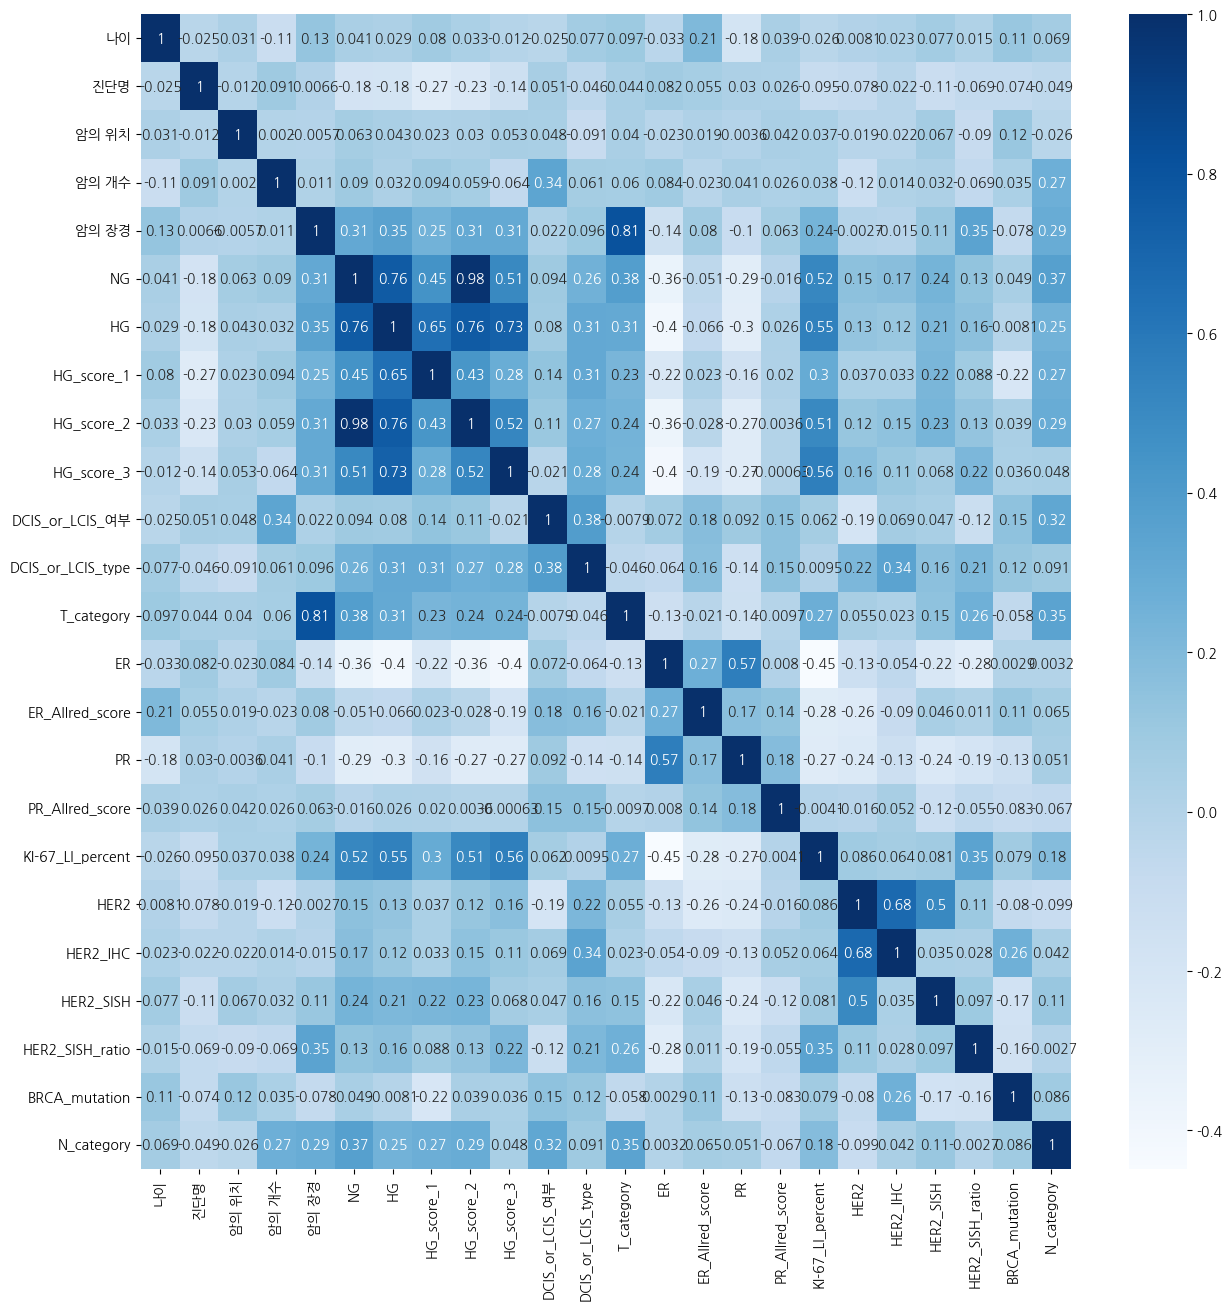

In [8]:
# 상관계수
plt.figure(figsize = (15,15))
sns.heatmap(train.corr(), annot = True, cmap="Blues");

## 데이터 전처리

In [9]:
# 진단명 칼럼 변수형데이터로 변경
진단명 = ["유관 상피내암", "소엽 상피내암", "점액성 암", "기타"]
train["진단명"] = train["진단명"].map(lambda x : 진단명[int(x-1)])
test["진단명"] = test["진단명"].map(lambda x : 진단명[int(x-1)])

In [10]:
# 암의 위치 칼럼 변수형데이터로 변경
암의위치 = ["Right", "Left", "Both"]
train["암의 위치"] = train["암의 위치"].map(lambda x : 암의위치[int(x-1)])
test["암의 위치"] = test["암의 위치"].map(lambda x : 암의위치[int(x-1)])

In [11]:
#암의 개수 칼럼 변수형데이터로 변경
암의개수 = ["single", "multiple"]
train["암의 개수"] = train["암의 개수"].map(lambda x : 암의개수[int(x-1)])
test["암의 개수"] = test["암의 개수"].map(lambda x : 암의개수[int(x-1)])

In [12]:
# 암의 장경 결측치 처리 (평균값 대입)
train["암의 장경_fill"] = train["암의 장경"].fillna(train["암의 장경"].mean())

In [13]:
test["암의 장경_fill"] = test["암의 장경"].fillna(test["암의 장경"].mean())

<AxesSubplot: >

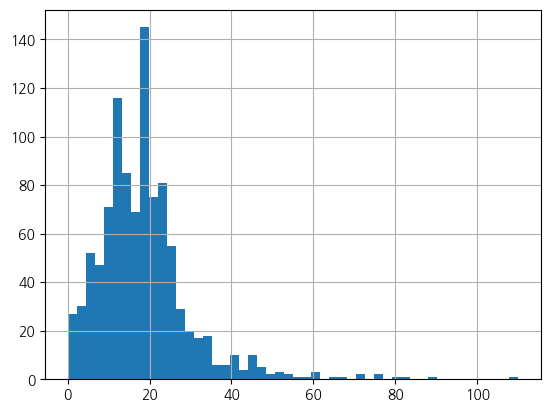

In [14]:
train["암의 장경_fill"].hist(bins = 50)

In [15]:
# 암의 장경 스케일링(standard scailing)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train["암의 장경_fill_ss"] = ss.fit(train[["암의 장경_fill"]]).transform(train[["암의 장경_fill"]])
train.head()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
test["암의 장경_fill_ss"] = ss.fit(test[["암의 장경_fill"]]).transform(test[["암의 장경_fill"]])
test.head()

In [ ]:
train["암의 장경_fill_ss"].hist(bins = 50)

In [ ]:
test["암의 장경_fill_ss"].hist(bins = 50)

In [ ]:
train["암의 장경_fill_ss_log"] = np.log1p(train["암의 장경_fill_ss"])
train["암의 장경_fill_ss_log"].hist(bins = 50)

In [ ]:
test["암의 장경_fill_ss_log"] = np.log1p(test["암의 장경_fill_ss"])
test["암의 장경_fill_ss_log"].hist(bins = 50)

In [ ]:
#암의 장경 결측치 평균값으로 대치
train["암의 장경_fill_ss_log"] = train["암의 장경_fill_ss_log"].fillna(train["암의 장경_fill_ss_log"].mean())
test["암의 장경_fill_ss_log"] = test["암의 장경_fill_ss_log"].fillna(test["암의 장경_fill_ss_log"].mean())

In [ ]:
# NG 칼럼 변수형데이터로 변경
def NG (x):
    if x == 1:
        return "NG1"
    elif x == 2:
        return "NG2"
    elif x == 3:
        return "NG3"

In [ ]:
train["NG"] = train["NG"].map(lambda x : NG(x))

In [ ]:
test["NG"] = test["NG"].map(lambda x : NG(x))

In [ ]:
# HG 칼럼 변수형데이터로 변경
train["HG"] = train["HG"].fillna(4.)
test["HG"] = test["HG"].fillna(4.)


In [ ]:
HG_list = ["HG1", "HG2", "HG3", "not graded"]
train ["HG"] = train["HG"].map(lambda x : HG_list[int(x)-1])
test ["HG"] = test["HG"].map(lambda x : HG_list[int(x)-1])

In [ ]:
# HG_score_1 칼럼 변수형데이터로 변경
train["HG_score_1"] = train["HG_score_1"].fillna(4.)
test["HG_score_1"] = test["HG_score_1"].fillna(4.)
HG_score1_list = ["score1", "score2", "score3", "not graded"]
train ["HG_score_1"] = train["HG_score_1"].map(lambda x : HG_score1_list[int(x)-1])
test ["HG_score_1"] = test["HG_score_1"].map(lambda x : HG_score1_list[int(x)-1])

In [ ]:
# HG_score_2 칼럼 변수형데이터로 변경
train["HG_score_2"] = train["HG_score_2"].fillna(4.)
test["HG_score_2"] = test["HG_score_2"].fillna(4.)
HG_score2_list = ["score1", "score2", "score3", "not graded"]
train ["HG_score_2"] = train["HG_score_2"].map(lambda x : HG_score2_list[int(x)-1])
test ["HG_score_2"] = test["HG_score_2"].map(lambda x : HG_score2_list[int(x)-1])

In [ ]:
# HG_score_3 칼럼 변수형데이터로 변경
train["HG_score_3"] = train["HG_score_3"].fillna(4.)
test["HG_score_3"] = test["HG_score_3"].fillna(4.)
HG_score3_list = ["score1", "score2", "score3", "not graded"]
train ["HG_score_3"] = train["HG_score_3"].map(lambda x : HG_score3_list[int(x)-1])
test ["HG_score_3"] = test["HG_score_3"].map(lambda x : HG_score3_list[int(x)-1])

In [ ]:
train["DCIS_or_LCIS_여부"].unique()

In [ ]:
# DCIS_or_LCIS_여부 칼럼 변수형데이터로 변경
DCIS_or_LCIS = ["no DCIS/LCIS", "EIC-", "EIC+"]
train ["DCIS_or_LCIS_여부"] = train["DCIS_or_LCIS_여부"].map(lambda x : DCIS_or_LCIS[int(x)-1])
test ["DCIS_or_LCIS_여부"] = test["DCIS_or_LCIS_여부"].map(lambda x : DCIS_or_LCIS[int(x)-1])

In [ ]:
# 결측치가 많아 칼럼 삭제
train = train.drop(columns="DCIS_or_LCIS_type")
test = test.drop (columns = "DCIS_or_LCIS_type")

In [ ]:
# T_category 칼럼 결측치 0을 대치
train["T_category"] = train["T_category"].fillna(0)
test["T_category"] = test["T_category"].fillna(0)

In [ ]:
# T_category 칼럼 변수형데이터로 변경
T_category = ["Tis", "T1", "T2", "T3", "T4"]
train ["T_category"] = train["T_category"].map(lambda x : T_category[int(x)])
test ["T_category"] = test["T_category"].map(lambda x : T_category[int(x)])

In [ ]:
# ER 칼럼 결측치 0으로 대치
train["ER"] = train["ER"].fillna(0)
test["ER"] = test["ER"].fillna(0)

In [ ]:
# ER 칼럼 변수형데이터로 변경
ER = ["-", "+"]
train ["ER"] = train["ER"].map(lambda x : ER[int(x)])
test ["ER"] = test["ER"].map(lambda x : ER[int(x)])

In [ ]:
# ER_Allred_score칼럼 결측치 평균값 대치
train["ER_Allred_score"] = train["ER_Allred_score"].fillna(train["ER_Allred_score"].mean())
test["ER_Allred_score"] = test["ER_Allred_score"].fillna(test["ER_Allred_score"].mean())

In [ ]:
# PR 칼럼 결측치 0으로 대치
train["PR"] = train["PR"].fillna(0)
test["PR"] = test["PR"].fillna(0)

In [ ]:
# PR 칼럼 변수형데이터로 변경
PR = ["-", "+"]
train ["PR"] = train["PR"].map(lambda x : PR[int(x)])
test ["PR"] = test["PR"].map(lambda x : PR[int(x)])

In [ ]:
# PR_Allred_score칼럼 결측치 평균값 대치
train["PR_Allred_score"] = train["PR_Allred_score"].fillna(train["PR_Allred_score"].mean())
test["PR_Allred_score"] = test["PR_Allred_score"].fillna(test["PR_Allred_score"].mean())

In [ ]:
# KI-67_LI_percent 칼럼 전처리
train["KI-67_LI_percent"].hist(bins = 50)

In [ ]:
# KI-67_LI_percent 칼럼 결측치 평균갑으로 대치
train["KI-67_LI_percent"] = train["KI-67_LI_percent"].fillna(int(train["KI-67_LI_percent"].mean()))
test["KI-67_LI_percent"] = test["KI-67_LI_percent"].fillna(int(test["KI-67_LI_percent"].mean()))

In [ ]:
# KI-67_LI_percent 칼럼 스케일링
train["KI-67_LI_percent_ss"] = ss.fit(train[["KI-67_LI_percent"]]).transform(train[["KI-67_LI_percent"]])

In [ ]:
test["KI-67_LI_percent_ss"] = ss.fit(test[["KI-67_LI_percent"]]).transform(test[["KI-67_LI_percent"]])

In [ ]:
train["KI-67_LI_percent_logss"] = np.log1p(train["KI-67_LI_percent_ss"])
train["KI-67_LI_percent_logss"].hist(bins = 50)

In [ ]:
test["KI-67_LI_percent_logss"] = np.log1p(test["KI-67_LI_percent_ss"])
test["KI-67_LI_percent_logss"].hist(bins = 50)

In [ ]:
# KI-67_LI_percent 칼럼 결측치 평균값 대치
train["KI-67_LI_percent_logss"]= train["KI-67_LI_percent_logss"].fillna(0)
test["KI-67_LI_percent_logss"]= test["KI-67_LI_percent_logss"].fillna(0)

In [ ]:
# HER2 칼럼 결측치 0으로 대치
train["HER2"] = train["HER2"].fillna(0)
test["HER2"] = test["HER2"].fillna(0)

In [ ]:
# HER2 칼럼 변수형데이터로 변경
HER2 = ["-", "+"]
train ["HER2"] = train["HER2"].map(lambda x : HER2[int(x)])
test ["HER2"] = test["HER2"].map(lambda x : HER2[int(x)])

In [ ]:
# HER2_IHC 칼럼 결측치 0으로 대치
train["HER2_IHC"] = train["HER2_IHC"].fillna(0)
test["HER2_IHC"] = test["HER2_IHC"].fillna(0)

In [ ]:
# HER2_IHC 칼럼 변수형데이터로 변경
def HER2_IHC (x):
    if x == 0 or x == 1:
        return "Negative"
    elif x == 2:
        return "Equivocal"
    elif x == 3:
        return "Positive"
train ["HER2_IHC"] = train["HER2_IHC"].map(lambda x : HER2_IHC(int(x)))
test ["HER2_IHC"] = test["HER2_IHC"].map(lambda x : HER2_IHC(int(x)))

In [ ]:
# HER2_SISH 칼럼 결측치 0으로 대치
train["HER2_SISH"] = train["HER2_SISH"].fillna(0)
test["HER2_SISH"] = test["HER2_SISH"].fillna(0)

In [ ]:
# HER2_SISH 칼럼 변수형데이터로 변경
HER2_SISH = ["negative", "positive"]
train ["HER2_SISH"] = train["HER2_SISH"].map(lambda x : HER2_SISH[int(x)])
test ["HER2_SISH"] = test["HER2_SISH"].map(lambda x : HER2_SISH[int(x)])

In [ ]:
# HER2_SISH_ratio 칼럼 결측치가 많아 삭제
train = train.drop(columns="HER2_SISH_ratio")
test = test.drop(columns="HER2_SISH_ratio")

In [ ]:
# BRCA_mutation 칼럼 결측치가 많아 삭제
train = train.drop(columns="BRCA_mutation")
test = test.drop(columns="BRCA_mutation")

In [ ]:
train.columns

In [ ]:
test.columns

## 인코딩

In [ ]:
train2 = train.copy()
test2 = test.copy()

In [ ]:
train2.columns

In [ ]:
train2.info()

In [ ]:
train2 = train2[['나이', '진단명', '암의 위치', '암의 개수', 'NG', 'HG', 'HG_score_1', 'HG_score_2', 'HG_score_3',
       'DCIS_or_LCIS_여부', 'T_category', 'ER', 'ER_Allred_score', 'PR',
       'PR_Allred_score', 'HER2', 'HER2_IHC', 'HER2_SISH',
       'N_category', '암의 장경_fill_ss_log', 'KI-67_LI_percent_logss']]

In [ ]:
test2 = test2[['나이', '진단명', '암의 위치', '암의 개수', 'NG', 'HG', 'HG_score_1', 'HG_score_2', 'HG_score_3',
       'DCIS_or_LCIS_여부', 'T_category', 'ER', 'ER_Allred_score', 'PR',
       'PR_Allred_score', 'HER2', 'HER2_IHC', 'HER2_SISH', '암의 장경_fill_ss_log', 'KI-67_LI_percent_logss']]

In [ ]:
#원핫 인코딩
train3 = pd.get_dummies(train2)

In [ ]:
test3 = pd.get_dummies(test2)

## 학습, 정답 데이터 셋

In [ ]:
label_name = "N_category"
label_name

In [ ]:
train3.columns

In [ ]:
feature_names = ['나이', 'ER_Allred_score', 'PR_Allred_score',
       '암의 장경_fill_ss_log',
       'KI-67_LI_percent_logss', '진단명_기타', '진단명_소엽 상피내암', '진단명_유관 상피내암',
       '진단명_점액성 암', '암의 위치_Both', '암의 위치_Left', '암의 위치_Right',
       '암의 개수_multiple', '암의 개수_single', 'NG_NG1', 'NG_NG2', 'NG_NG3',
       'HG_HG1', 'HG_HG2', 'HG_HG3', 'HG_not graded', 'HG_score_1_not graded',
       'HG_score_1_score1', 'HG_score_1_score2', 'HG_score_1_score3',
       'HG_score_2_not graded', 'HG_score_2_score1', 'HG_score_2_score2',
       'HG_score_2_score3', 'HG_score_3_not graded', 'HG_score_3_score1',
       'HG_score_3_score2', 'HG_score_3_score3', 'DCIS_or_LCIS_여부_EIC+',
       'DCIS_or_LCIS_여부_EIC-', 'DCIS_or_LCIS_여부_no DCIS/LCIS', 'T_category_T1',
       'T_category_T2', 'T_category_T3', 'T_category_T4', 'T_category_Tis',
       'ER_+', 'ER_-', 'PR_+', 'PR_-', 'HER2_+', 'HER2_-',
       'HER2_IHC_Equivocal', 'HER2_IHC_Negative', 'HER2_IHC_Positive',
       'HER2_SISH_negative', 'HER2_SISH_positive']
feature_names

In [ ]:
X_train = train3[feature_names]
X_train.shape

In [ ]:
y_train = train3[label_name]
y_train.shape

In [ ]:
X_test = test3[feature_names]
X_test.shape

## 머신러닝 알고리즘

In [ ]:
# 랜덤포레스트 분류 모델
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_jobs= -1)

In [ ]:
max_depth = (range(170, 185))
max_features = [0.115, 0.116, 0.117, 0.118, 0.119, 0.12, 0.121,0.122,0.123,0.124,0.125]
parameters = {"max_depth":max_depth, "max_features": max_features}
from matplotlib.streamplot import Grid
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, parameters, n_jobs = -1, cv = 5)
clf.fit(X_train, y_train)


In [ ]:
'''
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {"max_depth": np.random.randint(180, 200, 10), 
                       "max_features": np.random.uniform(0.1, 0.5, 50)}
reg = RandomizedSearchCV(model, param_distributions=param_distributions, scoring = "neg_root_mean_squared_error", n_iter=50, cv = 5, n_jobs= -1, verbose=2, random_state=42)
reg.fit(X_train, y_train)
'''

In [ ]:
best_model = clf.best_estimator_
best_model

In [ ]:
best_model.fit(X_train, y_train)

## 피쳐 중요도 확인

In [ ]:
fi = pd.Series(best_model.feature_importances_)
fi.index = best_model.feature_names_in_
fi = fi.sort_values()

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x = fi , y = fi.index)

## 정확도 측정

In [ ]:
from sklearn.model_selection import cross_val_predict
y_val_pred = cross_val_predict(best_model, X_train, y_train)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_val_pred, average = 'macro')